# Capstone Project
## The Best Classifier
#### *A machine learning notebook*

##### _________________________________

## **1. Data Loading**

In [1]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-11-12 13:20:42--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.08s   

2020-11-12 13:20:42 (271 KB/s) - ‘loan_train.csv’ saved [23101/23101]



#### Importing some libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Making the DataFrame**

In [3]:
df = pd.read_csv("loan_train.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


##### _________________________________

## 2. Data Cleaning

In [4]:
# Getting rid of unessecary columns.

df1 = df[['Gender', 'age', 'education', 'Principal', 'terms', 'loan_status']]
df1.head()

,Gender,age,education,Principal,terms,loan_status
0,male,45,High School or Below,1000,30,PAIDOFF
1,female,33,Bechalor,1000,30,PAIDOFF
2,male,27,college,1000,15,PAIDOFF
3,female,28,college,1000,30,PAIDOFF
4,male,29,college,1000,30,PAIDOFF


In [5]:
# Renaming some columns.

df1.rename(columns={'Gender' : 'gender', 'Principal' : 'principal', 'loan_status' : 'default'}, inplace=True)
df1.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gender,age,education,principal,terms,default
0,male,45,High School or Below,1000,30,PAIDOFF
1,female,33,Bechalor,1000,30,PAIDOFF
2,male,27,college,1000,15,PAIDOFF
3,female,28,college,1000,30,PAIDOFF
4,male,29,college,1000,30,PAIDOFF


Let's see the unique values of our columns.

In [6]:
print('Gender values:', df1['gender'].unique())
print('Education values:', df1['education'].unique())
print('Defaul values:', df1['default'].unique())

Gender values: ['male' 'female']
Education values: ['High School or Below' 'Bechalor' 'college' 'Master or Above']
Defaul values: ['PAIDOFF' 'COLLECTION']


**We will change the values in columns 'gender', 'education' and 'default' as follows:**

* Gender: ['male', 'female'] --> [0, 1]
* Education: ['High School or Below', 'College', 'Bachelor', 'Master or Above'] --> [1, 2, 3, 4]
* Default: ['PAIDOFF', 'COLLECTION'] --> [0, 1]

In [7]:
df1['gender'].replace(['male', 'female'], [0,1], inplace=True)
df1['education'].replace(['High School or Below', 'college', 'Bechalor', 'Master or Above'], [1, 2, 3, 4], inplace=True)
df1['default'].replace(['PAIDOFF', 'COLLECTION'], [0, 1], inplace=True)
df1.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,gender,age,education,principal,terms,default
0,0,45,1,1000,30,0
1,1,33,3,1000,30,0
2,0,27,2,1000,15,0
3,1,28,2,1000,30,0
4,0,29,2,1000,30,0


##### _________________________________

## 3. Data Exploration and Visualization

In [8]:
df1['default'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Seems like the data are sorted.

We need to shuffle them a little.

In [9]:
df1 = df1.sample(frac=1).reset_index(drop=True)

In [10]:
df1['default'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [11]:
df1.dtypes

gender       int64
age          int64
education    int64
principal    int64
terms        int64
default      int64
dtype: object

In [12]:
df1.describe()

,gender,age,education,principal,terms,default
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.150289,30.939306,1.702312,943.641618,22.653179,0.248555
std,0.357872,6.039418,0.706775,109.425530,7.991006,0.432801
min,0.000000,18.000000,1.000000,300.000000,7.000000,0.000000
25%,0.000000,27.000000,1.000000,900.000000,15.000000,0.000000
50%,0.000000,30.000000,2.000000,1000.000000,30.000000,0.000000
75%,0.000000,35.000000,2.000000,1000.000000,30.000000,0.000000
max,1.000000,51.000000,4.000000,1000.000000,30.000000,1.000000


In [13]:
# 0:paidoff
# 1:defaulted

df1['default'].value_counts()

0    260
1     86
Name: default, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff27c5ba710>,
      dtype=object)

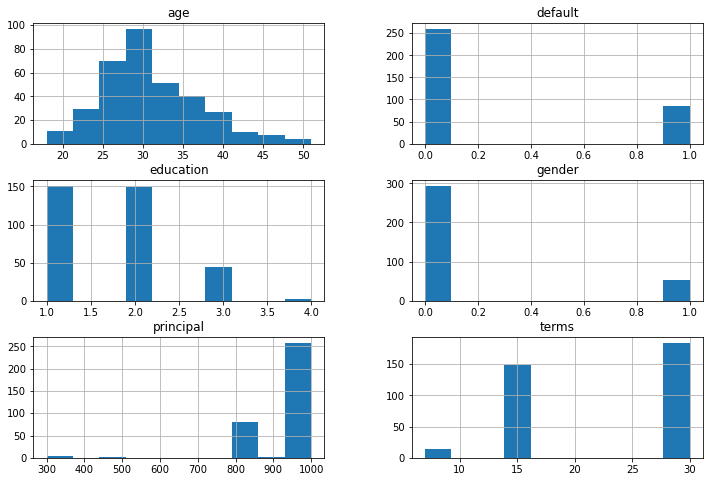

In [14]:
df1.hist(figsize=(12,8))

##### _________________________________

## 4. Machine Learning Algorithms

### Preprocessing

In [15]:
# Setting the X matrix.

X = df1[['gender', 'age', 'education', 'principal', 'terms']].values
X[0:10]

array([[   0,   40,    2, 1000,   30],
       [   0,   21,    2,  800,   15],
       [   0,   23,    1, 1000,   30],
       [   0,   33,    2,  800,   15],
       [   0,   25,    2, 1000,   15],
       [   0,   28,    1, 1000,   30],
       [   0,   20,    2, 1000,   30],
       [   1,   24,    3, 1000,   15],
       [   1,   27,    2, 1000,   30],
       [   0,   30,    2, 1000,   15]])

In [16]:
# Setting the y vector.

y = df1['default'].values
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [17]:
# Normalizing.

from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.42056004,  1.50243219,  0.42180183,  0.51578458,  0.92071769],
       [-0.42056004, -1.64812258,  0.42180183, -1.31458942, -0.95911111],
       [-0.42056004, -1.31648524, -0.99512471,  0.51578458,  0.92071769],
       [-0.42056004,  0.34170148,  0.42180183, -1.31458942, -0.95911111],
       [-0.42056004, -0.98484789,  0.42180183,  0.51578458, -0.95911111]])

## a. KNN

### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 5) (242,)
Test set: (104, 5) (104,)


### Classification

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

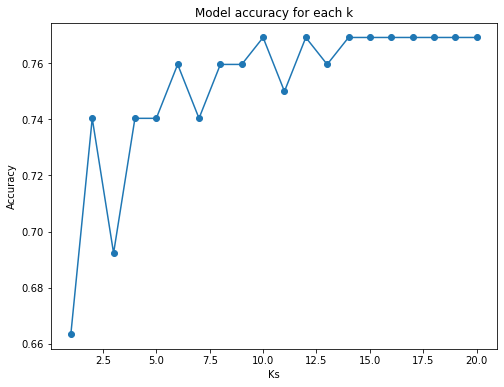

Max accuracy score: 0.7692307692307693 at K: 9


In [20]:
# k selection.

K=[] # list of Ks
Acc=[] # list of accuracy scores

for k in range(1,21):
    # Trainig
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # Predicting
    yhat = neigh.predict(X_test)
    # Evaluating
    acc = metrics.accuracy_score(y_test, yhat)
    K.append(k)
    Acc.append(acc)
    
# Plotting
plt.figure(figsize=(8,6))
plt.scatter(K, Acc)
plt.plot(K, Acc)
plt.title('Model accuracy for each k')
plt.ylabel('Accuracy')
plt.xlabel('Ks')
plt.show()

print('Max accuracy score:', max(Acc), 'at K:', Acc.index(max(Acc)))

In [21]:
k = Acc.index(max(Acc))
# Training  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

In [22]:
# Predicting
yhat = neigh.predict(X_test)
yhat[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Evaluation

In [23]:
# Accuracy 
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.768595041322314
Test set Accuracy:  0.7596153846153846


In [24]:
# KNN_scores
print('F1_score:', metrics.f1_score(y_test, yhat))
print('Jaccard_score:', metrics.jaccard_score(y_test, yhat))
print('LogLoss_score:', metrics.log_loss(y_test, yhat))

F1_score: 0.19354838709677416
Jaccard_score: 0.10714285714285714
LogLoss_score: 8.302621233293154


## B. Decision Tree

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 5) (242,)
Test set: (104, 5) (104,)


### Classification

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Training
dt = DecisionTreeClassifier().fit(X_train, y_train)
dt

DecisionTreeClassifier()

In [27]:
# Predicting
yhat = dt.predict(X_test)
yhat[0:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

### Evaluation

In [28]:
# Accuracy 
print("Train set Accuracy: ", metrics.accuracy_score(y_train, dt.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8388429752066116
Test set Accuracy:  0.6826923076923077


In [29]:
# DecisionTree_scores
print('F1_score:', metrics.f1_score(y_test, yhat))
print('Jaccard_score:', metrics.jaccard_score(y_test, yhat))
print('LogLoss_score:', metrics.log_loss(y_test, yhat))

F1_score: 0.19512195121951217
Jaccard_score: 0.10810810810810811
LogLoss_score: 10.959519382679279


## C. Support Vector Machine

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 5) (242,)
Test set: (104, 5) (104,)


### Classification

In [31]:
from sklearn import svm

# Training
svm = svm.SVC(kernel='linear').fit(X_train, y_train)
svm

SVC(kernel='linear')

In [32]:
# Predicting
yhat = svm.predict(X_test)
yhat[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Evaluation

In [33]:
# Accuracy 
print("Train set Accuracy: ", metrics.accuracy_score(y_train, svm.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.743801652892562
Test set Accuracy:  0.7692307692307693


In [34]:
# SVM_scores
print('F1_score:', metrics.f1_score(y_test, yhat))
print('Jaccard_score:', metrics.jaccard_score(y_test, yhat))
print('LogLoss_score:', metrics.log_loss(y_test, yhat))

F1_score: 0.0
Jaccard_score: 0.0
LogLoss_score: 7.970486860364004


## D. Logistic Regression

### Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 5) (242,)
Test set: (104, 5) (104,)


### Classification

In [36]:
from sklearn.linear_model import LogisticRegression

# Training
logreg = LogisticRegression().fit(X_train,y_train)
logreg

LogisticRegression()

In [37]:
# Predicting
yhat = logreg.predict(X_test)
yhat[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Evaluation

In [38]:
# Accuracy 
print("Train set Accuracy: ", metrics.accuracy_score(y_train, logreg.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.743801652892562
Test set Accuracy:  0.7692307692307693


In [39]:
# LogisticRegression_scores
print('F1_score:', metrics.f1_score(y_test, yhat))
print('Jaccard_score:', metrics.jaccard_score(y_test, yhat))
print('LogLoss_score:', metrics.log_loss(y_test, yhat))

F1_score: 0.0
Jaccard_score: 0.0
LogLoss_score: 7.970486860364004


## 5. Conclusion

I cannot figure out why some algos have zero f1_score and jaccard_index.

Please comment your opinion.